# Module 6 - LLMOps

> **Traditional MLOps**

I like to define MLOps as DevOps plus DataOps plus ModelOps. That means a set of processes and automation for managing ML assets like code, data, and models to improve performance and long-term efficiency, our two goals.

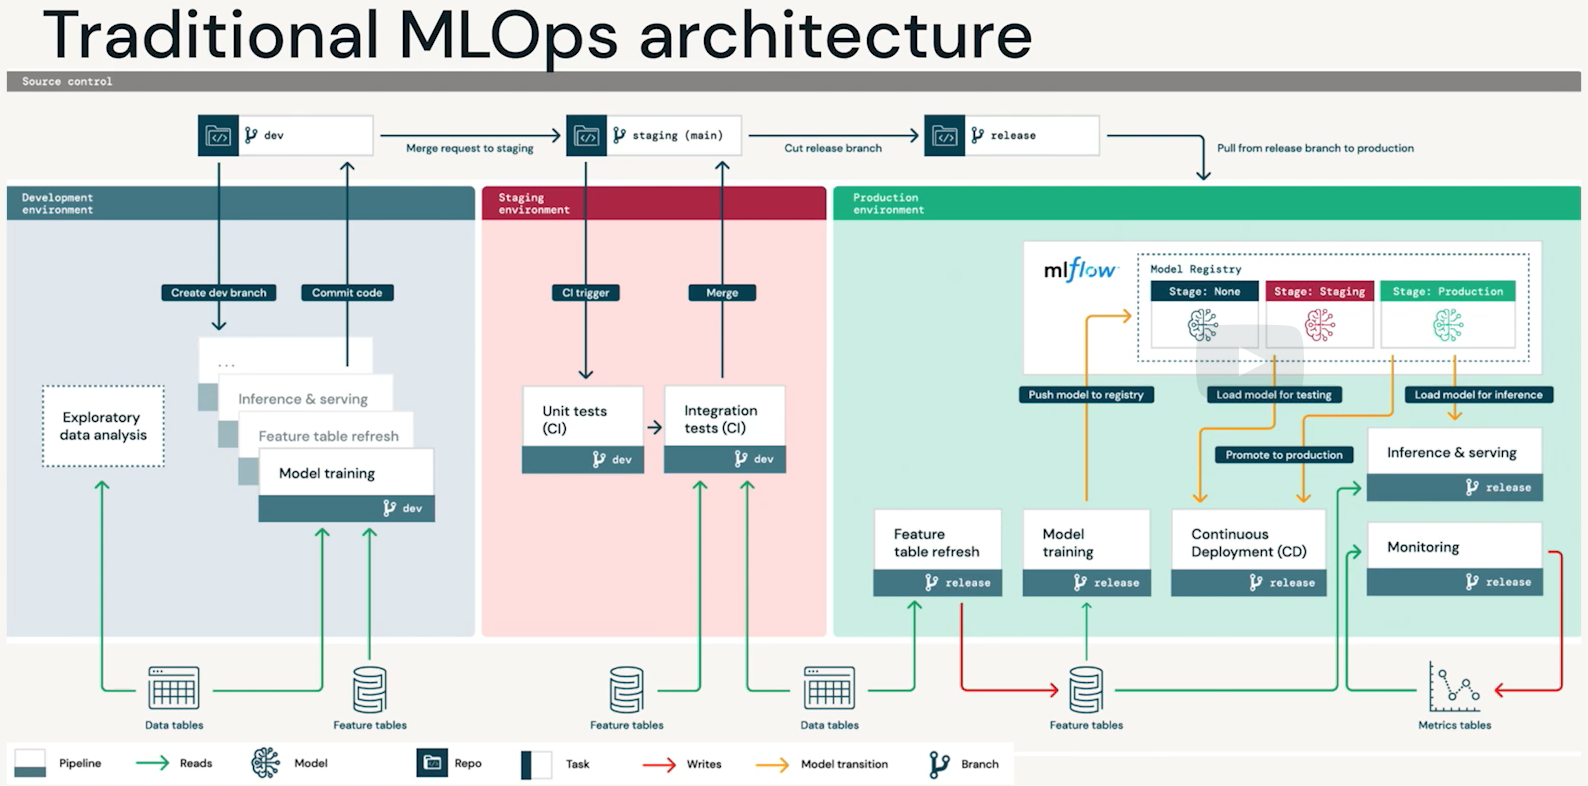

Going through a high level reference architecture for traditional MLOps shown here. Like all good reference architectures, this is a generalization, but I think it highlights a lot of key ideas. At the top, you'll see source control for
managing code. At the bottom, a Lakehouse
data layer, and going left to right in
the middle are development, staging, and
production environments.

Starting on the left,
a data scientist for example might operate
in the development environment. Maybe
doing some exploratory data analysis 
that code might not move towards
production but also writing pipelines
like a model training pipeline, a feature
table refresh pipeline, and these are
geared towards production.
Once those are ready, they can be
committed to source control, and that is
going to be one of our primary conduits
for moving ML assets code in
particular towards production.

At the bottom is our Lakehouse data
layer. I think key elements here
are that
it is a shared data layer across a
possibly diverse set of tools forming
this broader MLOps set of environments
and systems.
Having shared access, but with access
controls, is very important, for a Data
Scientist for example operating in the
development environment might need read
access to production data in order to
debug something out there, but they
certainly shouldn't have right access.
And so this kind of flexible control
with shared access to this data and a single
source of truth is really valuable.

Now, as our code moves towards the
staging environment,
it goes through Continuous Integration
or CI tests.
That basically breaks down into quick
unit tests (Does this piece of code work
in isolation?) and longer integration
tests (Does this piece of code work
alongside all the other pipelines and
services it'll see in production?).
That last point is crucial: the staging
environment needs to mimic the
production environment as closely as
reasonable.
That means the same set of services, the
same set of pipelines, and so in this
simplified
reference diagram, we're not showing all
those pipelines explicitly, but when we
look at production, remember that those
same pipelines and services are
instantiated in staging, just maybe in a
smaller setting (less data for faster
tests).
Once tests have passed, that code can
move towards production.
Here we've zoomed in a bit, showing all
those pipelines which were being
developed in Dev, tested in Staging, and
now are instantiated in Production.

Going from the bottom left, we have data
being read into a feature table refresh
job, maybe written out to a feature table.
That could be done in a batch mode,
streaming, whatever.
That might be fed into, say, an automatic
model retraining pipeline, maybe run
once a week.
When a new model is produced, it is put
into that model registry at the top
layer.
If you're not familiar with MLflow or
model registries, think of them like
opinionated repositories for models.
Opinionated in the sense that they come
with statements of: this model has this
many versions, and for this version it is
in a stage development, staging,
or production, basically tracking these
different model versions as they move
towards production readiness.

Speaking of moving them towards
production, that's what the Continuous
Deployment or CD pipeline does.
It puts those through either incremental
rollout or stages of tests
and eventually marks them ready for
production, at which point they can be
loaded into inference and serving systems
on the right and also monitored.

Now we can turn to the
question of, what happens when we throw
an LLM in here?

> **LLMOps**

The LLMOps diagram is the same diagram we just saw
in MLOps, but I'll walk
through and point out a few key areas.

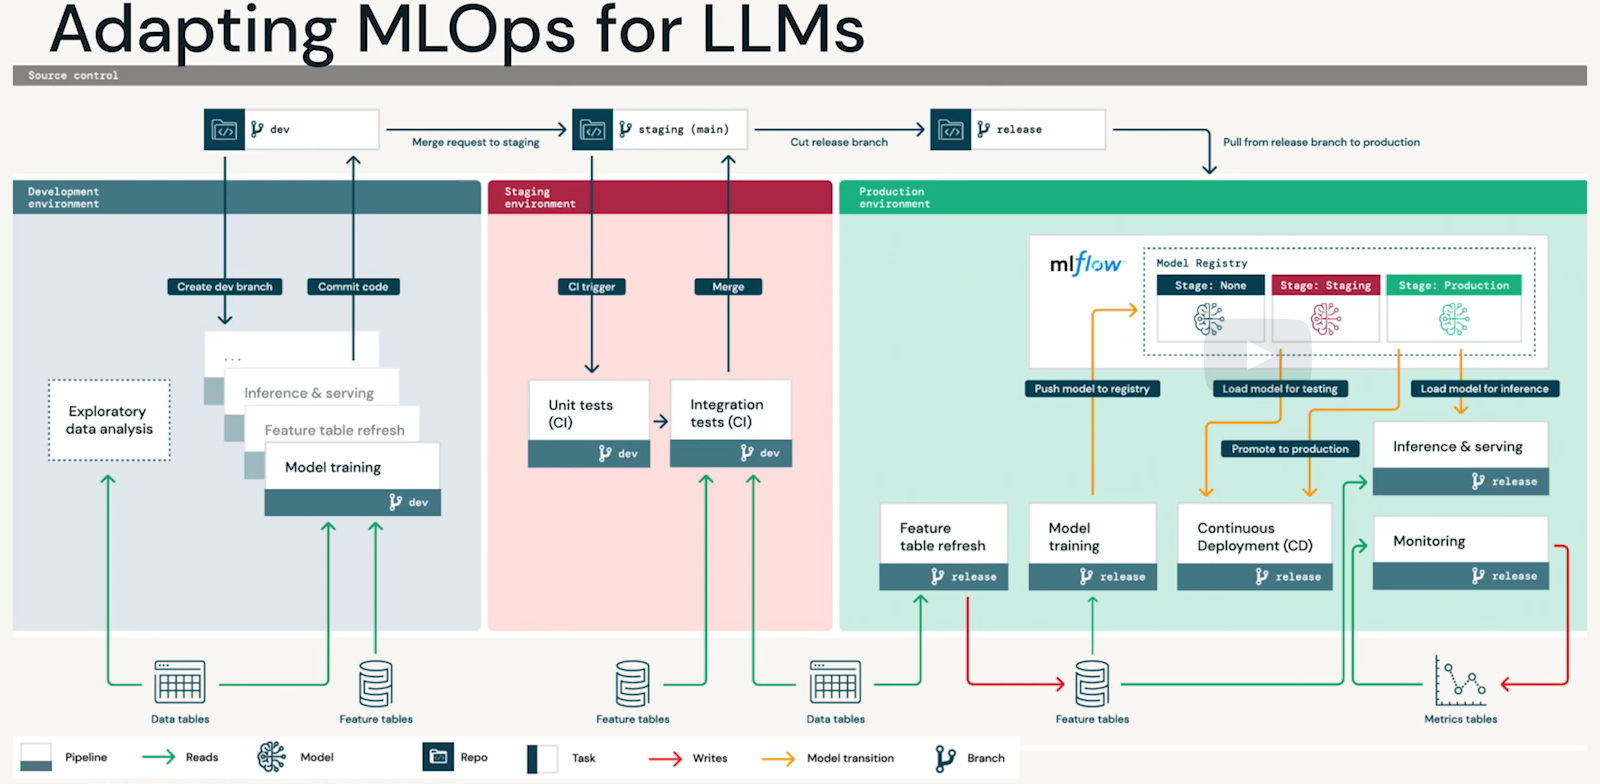

First, model training might change.
In traditional ML, you often retrain a
model pretty frequently.
As we've discussed previously in the
course, model training (outright
completely de novo training) for an LLM
is often infeasible, so this might be
replaced with something lighter weight
like model fine-tuning, which still
produces a new model,
or maybe pipeline tuning or prompt
engineering, and these don't produce new
models, but note that no matter what we
do,
all of these are pipelines or fine-tuned
models. They're either models or pieces
of code and our existing MLOps
infrastructure knows how to handle those.

Next, we've talked about human feedback,
that being really important for LLMs, and
so I'll say two comments about them. 
- In the bottom left, human/user feedback should be treated as an important data source, available from development to production. And I'm saying data source because you may aggregate this feedback from multiple potential sources, internal and external.
- On the right, traditional monitoring, which is often fairly automatable, may need to be augmented by a constant human feedback loop. 

Now, automated quality testing related to
human feedback may be much more
difficult.
So we've talked about how it needs to be
augmented with human evaluation, and the
place where that will probably happen is
in this Continuous Deployment part.
Rather than doing what you might do with
traditional ML like test on batch
datasets offline,
you'll more likely do incremental
rollouts, showing the model or LLM
pipeline to a small set of users, seeing
how they respond, and increasing that
percentage as you gain confidence.

You also might see different production
tooling.
A big model might necessitate moving
serving from CPUs to GPUs,
and your data layer might have a new
object like a vector database.
Now, cost and performance can also be
challenging. We've talked about this
earlier in the course, and here I'll
point out that model training or
tuning may need to be managed carefully
on the left,
and then in serving you may see larger
cost, latency, and performance trade-offs,
especially when you're comparing your
own fine-tuned model versus a paid
third-party LLM API.
I will give the caveat that I'm
comparing against traditional ML, by
which I mean, if you're coming from a
computer vision or NLP background where
you worked a lot with deep learning
already, LLMs are going to be pretty
familiar in terms of the costs of
training, fine-tuning, and inference.
So we've seen some things which may
change,
but even more will remain similar if you
look at this diagram.
The dev-staging-production separation
and access controls for enforcing those
remains the same. Our conduits for
shipping pipelines and models are still
git and model registries.
The Lakehouse architecture for managing
data is still critical.
Our CI infrastructure can be reused, and we
still have this modular structure for MLOps,
where we developed these modular
data pipelines and services you see in
the boxes here.
But we did mention some things which
change, so in the next video, we're going
to dive into a few more details about
those.

> **LLMOps Details**

Key Concerns:
- Prompt Engineering
- Packaging Models or Pipelines for Deployment
- Scaling Out
- Managing Cost/Performance Tradeoffs
- Human Feedback, Testing & Monitoring
- Deploying Model VS Deploying Code
- Service Infrastructure: Vector Databases & Complex Models

---

**Prompt Engineering**

There are aspects of prompt
engineering which are important to
consider in order to move things towards
production. I'll call that Ops.
For prompt engineering, you may hit
things in this order: wanting to track, then
template, then automate.

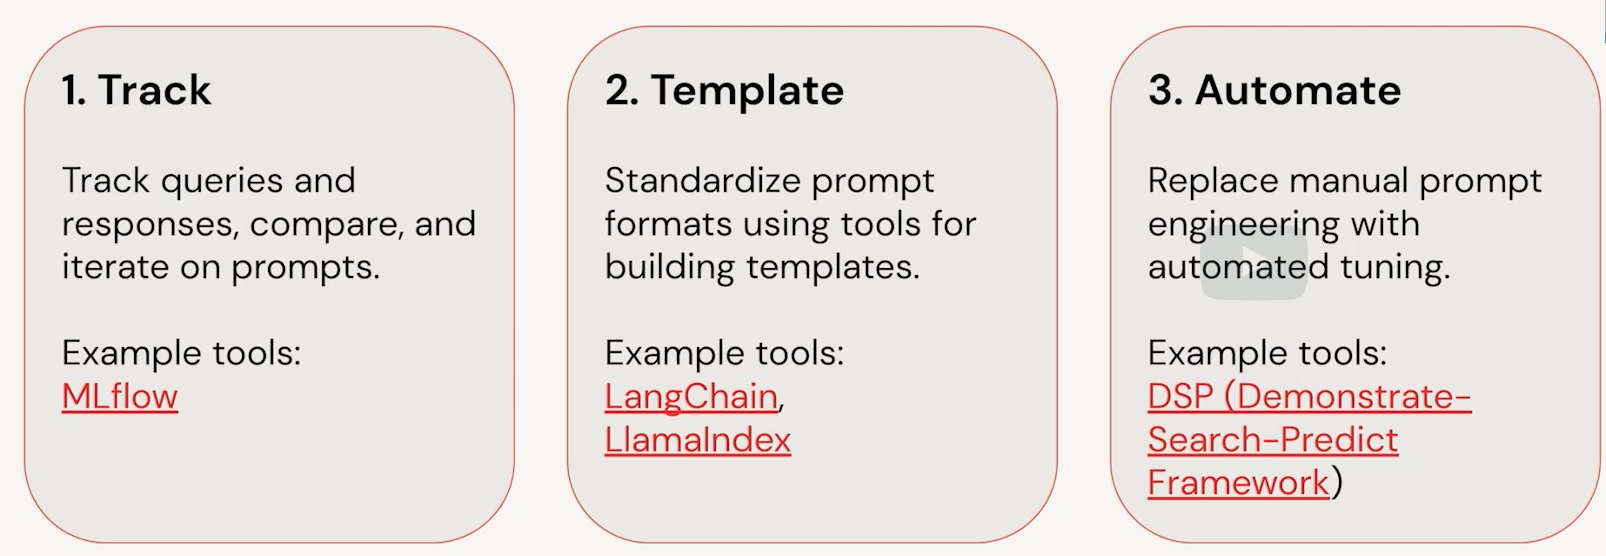

- So by tracking, I mean tracking queries and responses, comparing these, iterating on prompts. And for this, you might use tools like MLflow, which offers some native LLM capabilities. This is very useful when you have a smaller number of queries, when you're iterating quickly doing detailed comparisons. And here MLflow and such tools may be very useful in development. When you go towards staging and production, you'll probably start to treat query and response pairs more like traditional data and data pipelines because you have a lot more queries and you want to do more aggregate comparisons.

- Next may come templating. Here, rather than creating prompts manually, you may want to standardize formats using tools for building templates like LangChain or LlamaIndex. Some of these APIs in there do this templating explicitly, and some implicitly under the hood.

- Finally, you may encounter wanting to do a bit more automation. That means replacing manual prompt engineering with more automated prompt tuning using tools like DSP or Demonstrate-Search-Predict framework. If you haven't seen this before, think of it like traditional hyperparameter tuning: Use a data-driven approach to tune hyperparameters. You can think of a prompt as a hyperparameter  a complex one but still a hyperparameter and use a data-driven approach to tune it.

---

**Packaging Models & Pipelines for Deployment**

Here our goal is really to
standardize deployment for many types of
models and pipelines. 

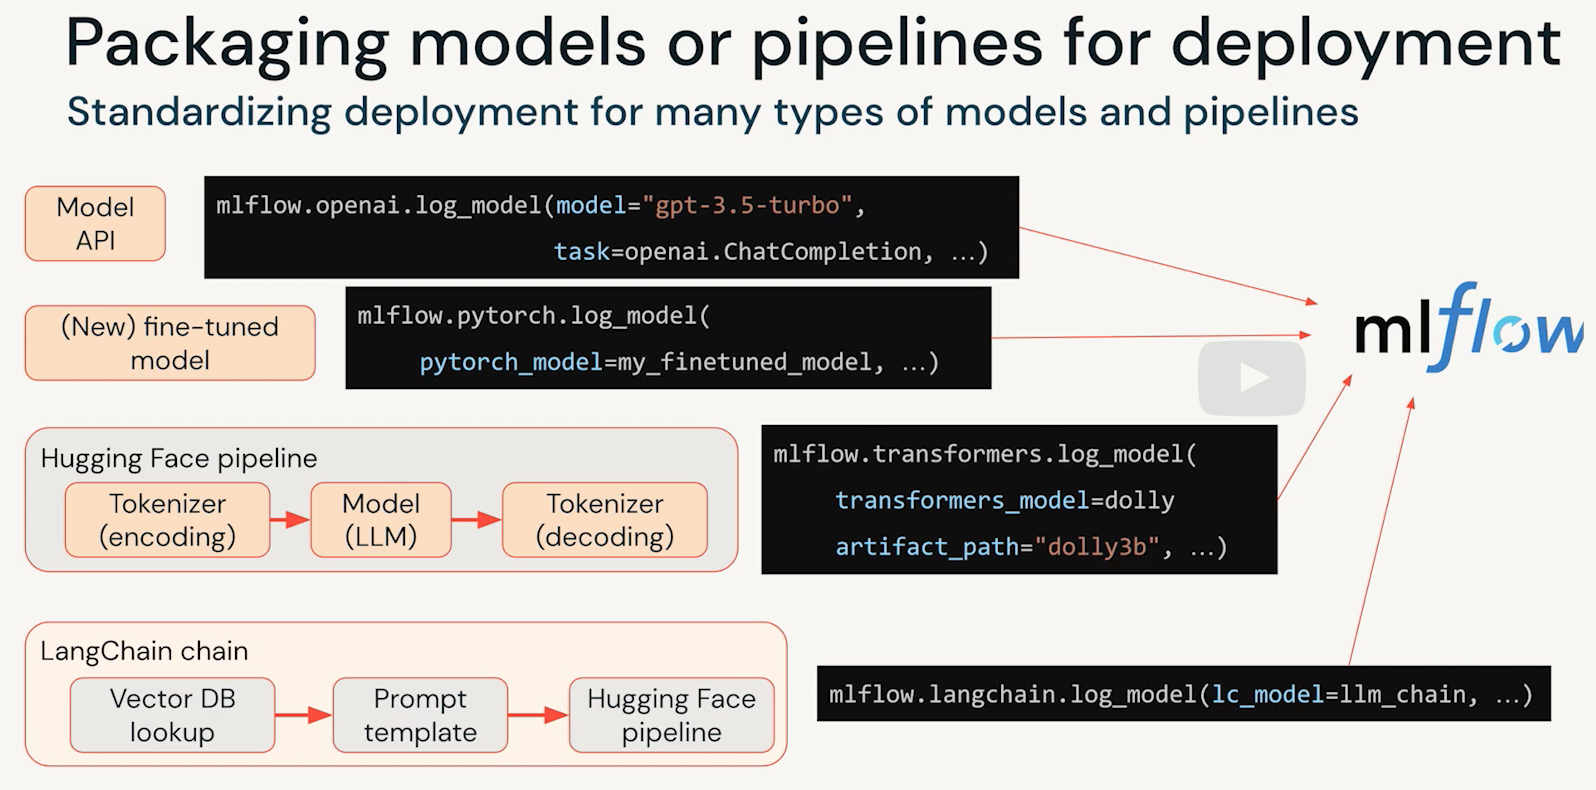

On the left you can
see some of those many types:
calling an existing model API, creating
and deploying a new fine-tuned model,
deploying a Hugging Face pipeline, maybe
a LangChain chain.
And for all of these our go-to tool is
MLflow. It offers what it calls flavors
for logging these different models in a
uniform format. This is going to help a
lot with deployment.

If you haven't seen MLflow, here is a one-slide
summary of it.

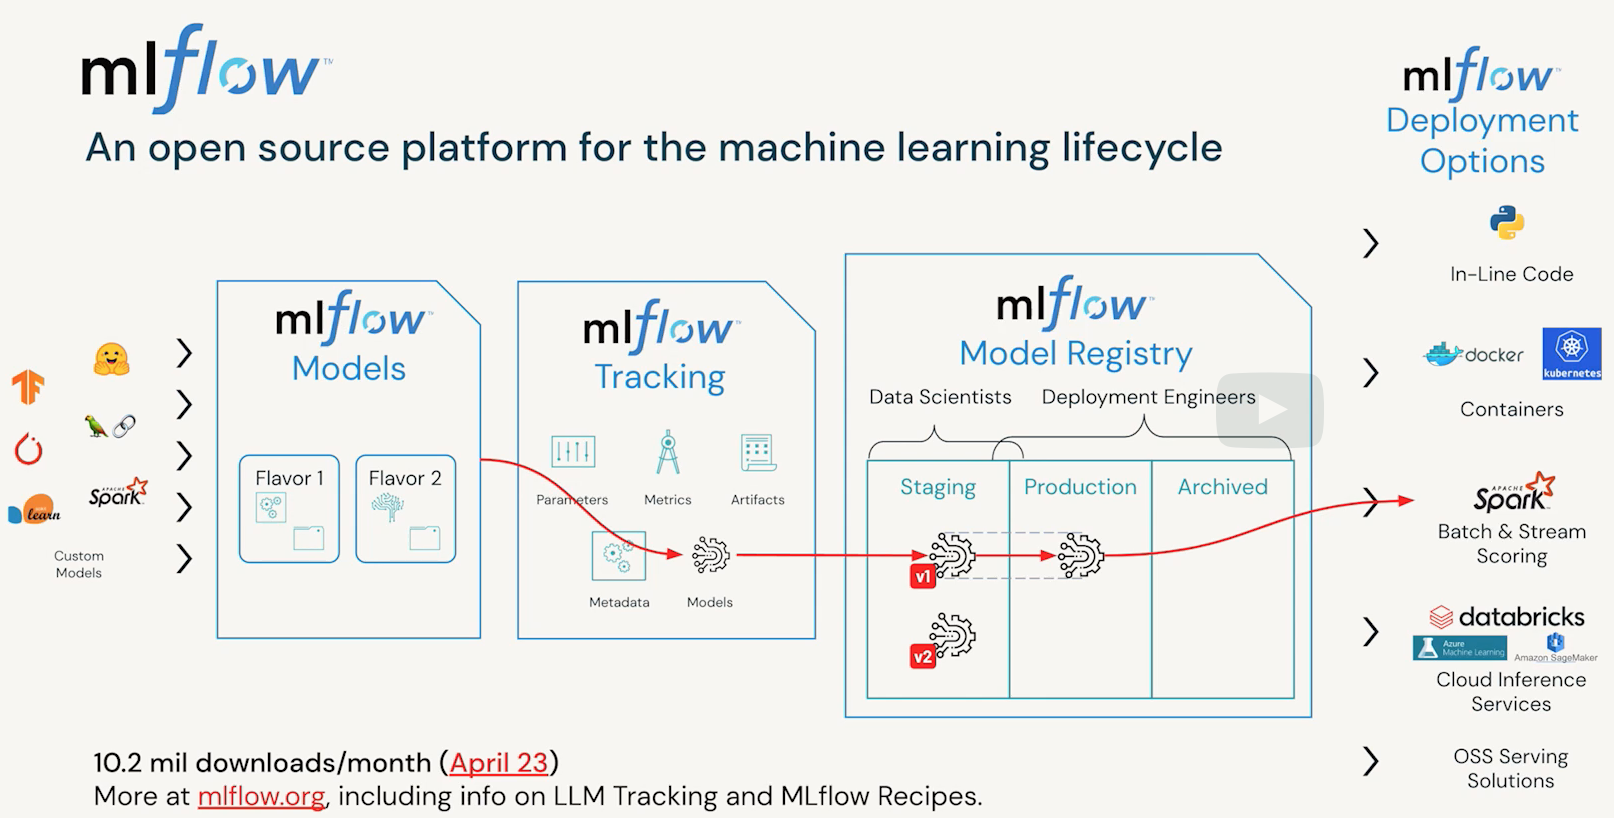

It is an open source platform for the ML
lifecycle. On the left, you can see a lot
of different libraries or custom ones.
You can log these as an MLflow, quote,
model meaning a standardized metadata
format
that can be logged to the MLflow
Tracking Server along with metrics,
parameters, other information about how
that model was produced.
That can then be registered in the Model
Registry, which tracks its movement
towards production, and then when it hits
production, it can be deployed in a lot
of ways: inline code, containers, batch or
streaming scoring, different inference
services, your custom services, and so
forth.
The point is, on the left you have a lot
of different models or libraries, on the
right a lot of deployment options, and in
the middle you want this operations part
to be as standardized as possible. That's
what MLflow does.

---

**Scaling Out**

Here, if you've seen this in traditional
ML, the concepts are all the same, but
the tools may change.

For fine tuning and training, we'll
probably use distributed TensorFlow or
PyTorch, or DeepSpeed, or tools like
that.
These may run on top of your existing
scale-out frameworks like Apache Spark
or Ray.

Serving and inference:
for real time we'll want scale-out
endpoints, and for streaming and batch
inference we'll want scale-out pipelines.
These will probably match your ones for
traditional ML, like Spark and Delta Lake.

---

**Managing Costs/Performance Tradeoffs**

We've already
covered some related topics like the
cost of training and inference and
techniques for reducing costs like
fine-tuning and creating smaller models.
There are a lot of metrics you might
optimize:
the cost of queries and training, time
for development, and so on.
We'll give some general tips, and really
it's up to you and your application
which of these is most appropriate.

First, go from simple to complex. Start
with existing models and APIs.
You can reduce the costs or improve
performance later.
Then invest in prompt engineering. That
can get you so far, and eventually,
especially once you've collected a
decent amount of labeled data, consider
fine-tuning.
Expect these fine-tuned models to
outperform generic models once you get
there.
You can scope out costs ahead of time,
especially development versus production
costs, and in terms of production look at
expected query load, how much each query
will cost, and so forth.
And then think about reducing those
costs.
That may mean probably at first doing
things which are quick and easy, like
shortening queries and responses or
tweaking inference configurations, just
to speed up computation.
Then use smaller models. That may mean
fine-tuning, but there are techniques we
won't have time to go into detail on in this
course like distillation, quantization,
and pruning.
Finally, I know we're over emphasizing it,
but get human feedback.
It's easy to make a model run faster.
It's a little harder to tell what the
impacts on your end users are unless you
ask them.
Finally, **don't over optimize. This is a
really fast changing area, and in six
months the trade-offs you're optimizing
here may differ**.

---

**Human Feedback, Testing & Monitoring**

We've established that it's critical, so
plan for it.
You know, you can explicitly pay people
to give feedback and that's fine, but
think about building applications which
have human feedback built into them from
the beginning.
Then operationally, human feedback can be
treated just like any other data: feeding
it into your Lakehouse, meaning it's
available both at production time for
monitoring but also in development for
further analysis and tuning.

---

**Deploying Models VS Deploying Code**

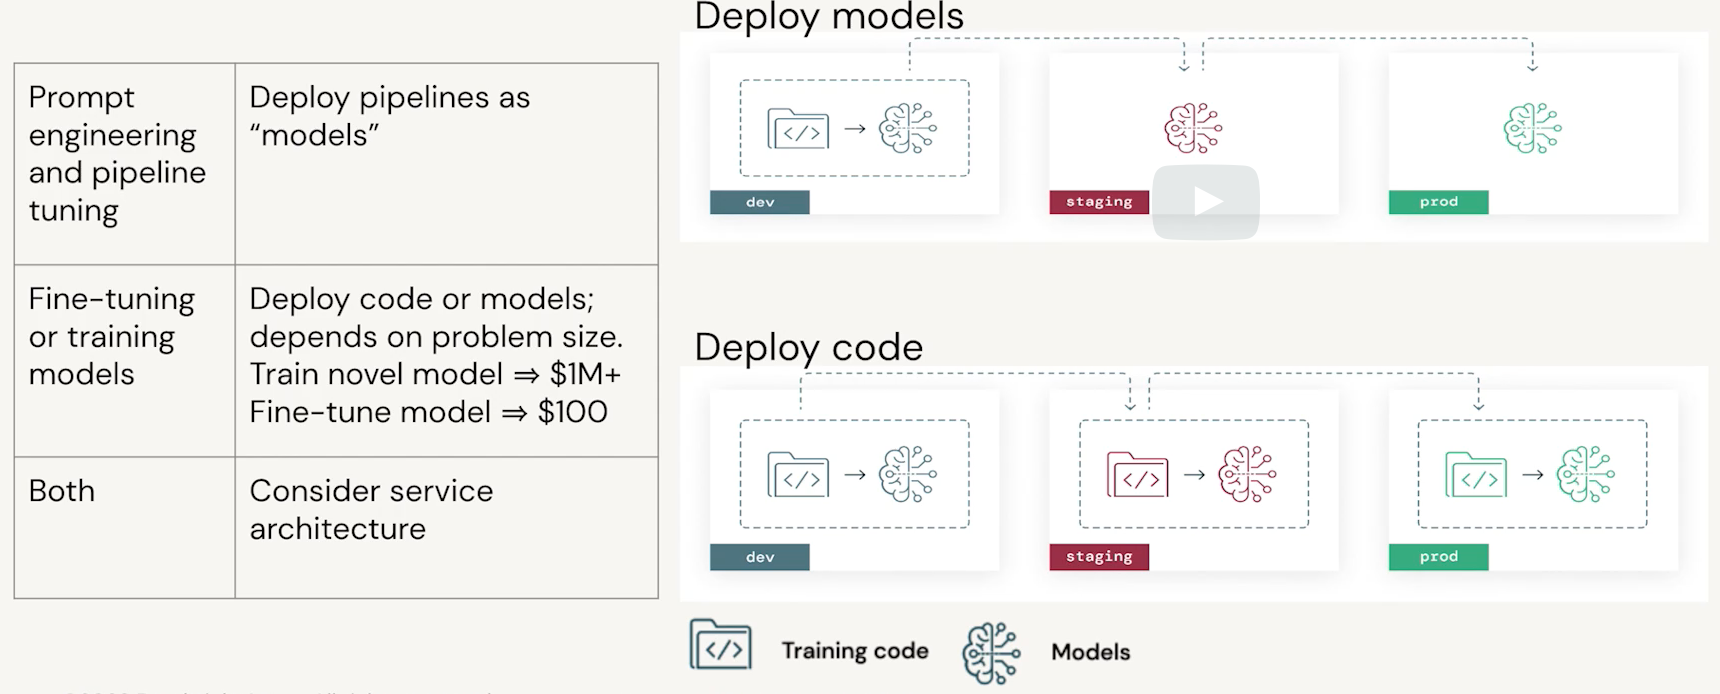

What assets are you moving from
development to production?
Remember in our reference architecture we
talked about both using version control
for code but also model registry for
models.
And so I will emphasize you may use both
of these in your architecture. It's
important really though to think
about which you are doing in any one
instance.
To explain what I mean by these, in the upper-right
is Deploying Models. In
development,
you write code; you produce a model;
and it's that model which is moved towards
production. In the bottom right with
Deploy Code, you write code to produce a
model and you move that code towards
production.
The model which is used in production is
actually created in production.
Now, Deploy Code may sound more expensive,
but keep in mind that in dev and staging
you may train on a tiny dataset
and only run for real in production.
Also keep in mind you have that
Continuous Deployment pipeline in
production which can do testing there.
And that's really the key point: think
about where you're doing testing.
If you know what you're deploying, i.e.,
at what point do you produce that final
model or code (that artifact which is
going to be put into production),
then you know where you need to test it.
On the left we try to instantiate this
with a few examples.
For prompt engineering and pipeline
tuning, here it's possible to deploy
those as code.
I would say you may want to think about
deploying those as models because MLflow
provides a way to wrap up those as, quote,
MLflow models and simply register them
in the MLflow registry; that may simplify
things.
For fine-tuning or training models,
you could go either route. I would say
think about your needs, your reference
architecture, but also think about the
expenses. Training a novel model of
course might cost a million dollars plus
or minus an order of magnitude.
Fine-tuning a model might cost a
hundred dollars,
and so it may make sense to have an
automated fine-tuning job in production.
It probably doesn't make sense to have an
automated de novo training job in
production.
And then in reality you may be
deploying multiple pipelines, deploying
multiple or fine-tuning multiple models.
Here, think about a service architecture.
I'm using the term service
architecture loosely, but basically think
about decoupling each of the processes
for moving these different models or
pipelines towards production.

---

**Service Infrastructure: Vector Databases & Complex Models**

Not all LLM applications require vector
databases. Some do, and when they do,
think about whether that LLM should call
the vector database as a separate
service or whether the vector DB should
just be a local library or tool
used within that LLM pipeline.
Say we're doing document Q&A.
That outer LLM pipeline is that doc Q&A
LLM. It calls into the vector DB to get
some documents for context.
In the top, we're showing it as a batch
job, and there you may often see this in
batch or streaming settings (or in demos)
that the vector DB will just be held in
local cache and not be a separate
service.
In the bottom, we're showing it pulled
out as its own service. That will make
sense when maybe you have multiple LLM
pipelines calling into it, or you want to
decouple them so you can update them
more independently.
I'd also note there are two LLMs here
potentially:
the main one on the left or outer part
which is your doc Q&A LLM, and then the
embedding used by the vector DB. That
embedding is
quite disjoint from the other LLM and
can be updated independently.
On the right, you can see a note on
complex models behind APIs.
And here when you start to think about
service architecture, you need to think
about stability.
But LLMs can have complex behavior and
can be stochastic, so how can you make
these LLM-based APIs stable and
compatible?
Say you're upgrading from LLM pipeline V1.0
on the left to 1.1 on the right.
What behavior would you expect in this
scenario? What about if you weren't even
upgrading the model? Would you expect the
query to return the same response all
the time?
Now if you're using certain paid APIs
(like OpenAI's APIs) they
kind of force you to specify an API
version, and that solves part of this
problem for you, forcing the user
to say: maintain this stable API version.
That said, there are inference
configurations we mentioned in previous
modules for making sure the
model is more deterministic, not
stochastic.
I think this really comes into play
though when you are offering as a
service an API powered by an LLM to
internal or external users in your
organization.
In that case,
think about versioning your endpoints,
and make sure your users know how to set
configurations for determinism.
This brings us to the end of the LLMOps
topics. Hope this gives you a good sense
of what you might think about for your
specific use cases.
And in the code, we're going to walk
through a detailed example going from
development to production with a
realistic, scale-out workflow.

---

# Summary

- LLMOps processes and automation which can help to ensure stable performance and long-term efficiency.
- This is very similar to traditional MLOps, but LLMs put some new requirements on those platforms. Still many parts remain the same as with traditional ML.
- Then, our recommendation is really to tackle challenges in each step of the LLMOps process as needed.